<a href="https://colab.research.google.com/github/mfakhru/nlp-emotion-classification/blob/main/NLP_emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing (NLP): Emotion Prediction**

Program ini merupakan model untuk multiclass text classification. Bertujuan untuk mendeteksi emosi di balik kata-kata yang tertulis.

Oleh:


> **Muhammad Fakhrurrozi Sutisna**



## Proses Persiapan

In [ ]:
# mengimpor library yang dibutuhkan

import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

## Persiapan Dataset

Dataset:
https://www.kaggle.com/ishantjuyal/emotions-in-text

In [ ]:
# mengupload dataset

files = files.upload()

Saving emotion.zip to emotion.zip


In [ ]:
# Unzip dataset dan menghapus file .zip

!unzip emotion.zip && rm emotion.zip

Archive:  emotion.zip
  inflating: Emotion_final.csv       


In [ ]:
# memasukan dataset kedalam dataframe

df = pd.read_csv('Emotion_final.csv')

# memeriksa dataset
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


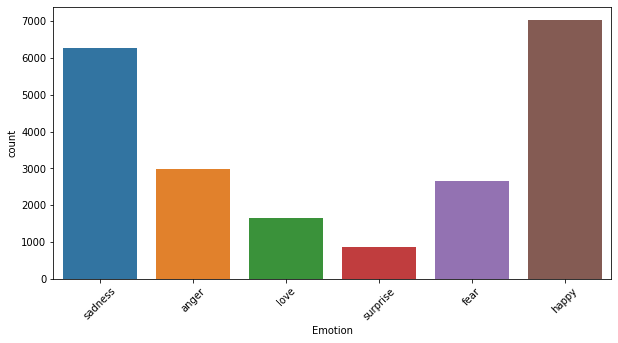

In [ ]:
# menampilkan grafik dataset

plt.figure(figsize=(10,5))
sns.countplot(df['Emotion'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# melakukan one-hot-encoding dan membuat df baru

emotion = pd.get_dummies(df.Emotion)
new_df = pd.concat([df, emotion], axis=1)
new_df = new_df.drop(columns='Emotion')

# menampilkan df baru
new_df

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


jumlah dataset 21458 sampel.

In [ ]:
## memisahkan dataframe

X = new_df['Text'].values
y = new_df.drop('Text', axis=1).values

In [ ]:
# membagi data train dan test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

validation set 20%.

## Fungsi Tokenizer

In [ ]:
# membuat fungsi Tokenizer 

tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)
     
sekuens_train = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)
     
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

menggunakan fungsi tokenizer.

## Membangun Model

In [ ]:
# fungsi Callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.91):
      print('\nAkurasi memenuhi target!')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# membangun model

model = tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.LSTM(64),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(6, activation='softmax')])

menggunakan model sequential, Embedding, LSTM.

In [ ]:
# mengcompile model

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# menampilkan rangkuman model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          160000    
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

## Melatih Model

In [ ]:
# melatih model dengan fungsi fit()

history = model.fit(padded_train,
                    y_train,
                    epochs=25,
                    validation_data=(padded_test, y_test),
                    callbacks=[callbacks],
                    batch_size=32)

Epoch 1/25
537/537 [==============================] - 19s 22ms/step - loss: 1.5145 - accuracy: 0.3354 - val_loss: 1.3262 - val_accuracy: 0.3889
Epoch 2/25
537/537 [==============================] - 11s 21ms/step - loss: 1.1705 - accuracy: 0.4701 - val_loss: 1.1319 - val_accuracy: 0.5953
Epoch 3/25
537/537 [==============================] - 11s 21ms/step - loss: 0.8347 - accuracy: 0.6685 - val_loss: 0.6456 - val_accuracy: 0.7351
Epoch 4/25
537/537 [==============================] - 11s 21ms/step - loss: 0.6799 - accuracy: 0.7269 - val_loss: 0.5902 - val_accuracy: 0.7586
Epoch 5/25
537/537 [==============================] - 11s 21ms/step - loss: 0.5993 - accuracy: 0.7498 - val_loss: 0.5676 - val_accuracy: 0.7600
Epoch 6/25
537/537 [==============================] - 11s 21ms/step - loss: 0.5494 - accuracy: 0.7651 - val_loss: 0.5279 - val_accuracy: 0.7663
Epoch 7/25
537/537 [==============================] - 11s 21ms/step - loss: 0.5025 - accuracy: 0.7837 - val_loss: 0.4971 - val_accuracy:

akurasi melebihi 90%.

## Menampilkan Hasil Pelatihan

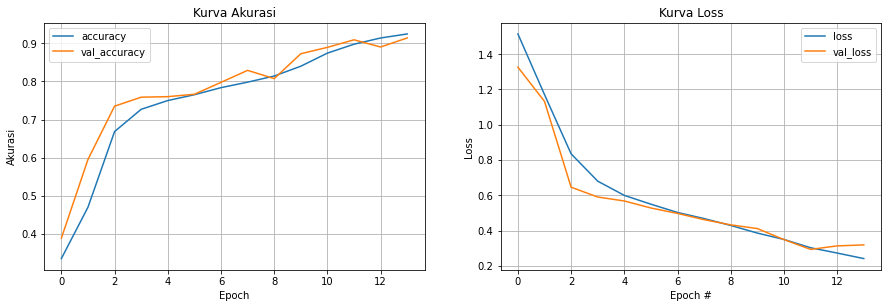

In [ ]:
# menampilkan kurva hasil pelatihan

fig = plt.figure(figsize=(8, 5))
fig.set_figheight(10)
fig.set_figwidth(15)

acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.subplot(2, 2, 1)
plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.title('Kurva Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title('Kurva Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.grid()